# DSCI 552 - Homework 5

### Name : Ashwin Chafale
### Github username : chafale
### USC-ID : 1990624801

## 1. Decision Trees as Interpretable Models

### 1 (a) Load [Acute Inflammations Data Set](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations)

In [34]:
import pandas as pd
import codecs

In [35]:
doc = codecs.open("../Data/diagnosis.data",'rU','UTF-16')
df = pd.read_csv(doc, sep='\t', header=None)
df.columns = ["Temperature of patient", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet", "Inflammation of urinary bladder", "Nephritis of renal pelvis origin"]
df

Temperature of patient Occurrence of nausea Lumbar pain Urine pushing  \
0                     35,5                   no         yes            no   
1                     35,9                   no          no           yes   
2                     35,9                   no         yes            no   
3                     36,0                   no          no           yes   
4                     36,0                   no         yes            no   
..                     ...                  ...         ...           ...   
115                   41,4                   no         yes           yes   
116                   41,5                   no          no            no   
117                   41,5                  yes         yes            no   
118                   41,5                   no         yes           yes   
119                   41,5                   no         yes           yes   

    Micturition pains Burning of urethra, itch, swelling of urethra outlet  \
0                  no                                                 no     
1                 yes                                                yes     
2                  no                                                 no     
3                 yes                                                yes     
4                  no                                                 no     
..                ...                                                ...     
115                no                                                yes     
116                no                                                 no     
117               yes                                                 no     
118                no                                                yes     
119                no                                                yes     

    Inflammation of urinary bladder Nephritis of renal pelvis origin  
0                                no                               no  
1                               yes                               no  
2                                no                               no  
3                               yes                               no  
4                                no                               no  
..                              ...                              ...  
115                              no                              yes  
116                              no                               no  
117                              no                              yes  
118                              no                              yes  
119                              no                              yes  

[120 rows x 8 columns]

#### Converting all yes/no to binary values

In [36]:
temp = []
for tm in df["Temperature of patient"]:
    temp.append(float(".".join(tm.split(","))))

df["Temperature of patient"] = temp
df["Occurrence of nausea"] = df["Occurrence of nausea"].map(dict(yes=1, no=0))
df["Lumbar pain"] = df["Lumbar pain"].map(dict(yes=1, no=0))
df["Urine pushing"] = df["Urine pushing"].map(dict(yes=1, no=0))
df["Micturition pains"] = df["Micturition pains"].map(dict(yes=1, no=0))
df["Burning of urethra, itch, swelling of urethra outlet"] = df["Burning of urethra, itch, swelling of urethra outlet"].map(dict(yes=1, no=0))
df["Inflammation of urinary bladder"] = df["Inflammation of urinary bladder"].map(dict(yes=1, no=0))
df["Nephritis of renal pelvis origin"] = df["Nephritis of renal pelvis origin"].map(dict(yes=1, no=0))
df

Temperature of patient  Occurrence of nausea  Lumbar pain  Urine pushing  \
0                      35.5                     0            1              0   
1                      35.9                     0            0              1   
2                      35.9                     0            1              0   
3                      36.0                     0            0              1   
4                      36.0                     0            1              0   
..                      ...                   ...          ...            ...   
115                    41.4                     0            1              1   
116                    41.5                     0            0              0   
117                    41.5                     1            1              0   
118                    41.5                     0            1              1   
119                    41.5                     0            1              1   

     Micturition pains  Burning of urethra, itch, swelling of urethra outlet  \
0                    0                                                  0      
1                    1                                                  1      
2                    0                                                  0      
3                    1                                                  1      
4                    0                                                  0      
..                 ...                                                ...      
115                  0                                                  1      
116                  0                                                  0      
117                  1                                                  0      
118                  0                                                  1      
119                  0                                                  1      

     Inflammation of urinary bladder  Nephritis of renal pelvis origin  
0                                  0                                 0  
1                                  1                                 0  
2                                  0                                 0  
3                                  1                                 0  
4                                  0                                 0  
..                               ...                               ...  
115                                0                                 1  
116                                0                                 0  
117                                0                                 1  
118                                0                                 1  
119                                0                                 1  

[120 rows x 8 columns]

#### Used one-hot encoding for multi-lable data
00 -> "No Inflammation of urinary bladder and No Nephritis of renal pelvis origin"
01 -> "No Inflammation of urinary bladder and Nephritis of renal pelvis origin"
10 -> "Inflammation of urinary bladder and No Nephritis of renal pelvis origin"
11 -> "Inflammation of urinary bladder and Nephritis of renal pelvis origin"

In [38]:
import numpy as np
class_label = []

for val1, val2 in np.array(df.iloc[:,6:]):
    class_label.append(str(val1) + str(val2))

df['class'] = class_label
df

Temperature of patient  Occurrence of nausea  Lumbar pain  Urine pushing  \
0                      35.5                     0            1              0   
1                      35.9                     0            0              1   
2                      35.9                     0            1              0   
3                      36.0                     0            0              1   
4                      36.0                     0            1              0   
..                      ...                   ...          ...            ...   
115                    41.4                     0            1              1   
116                    41.5                     0            0              0   
117                    41.5                     1            1              0   
118                    41.5                     0            1              1   
119                    41.5                     0            1              1   

     Micturition pains  Burning of urethra, itch, swelling of urethra outlet  \
0                    0                                                  0      
1                    1                                                  1      
2                    0                                                  0      
3                    1                                                  1      
4                    0                                                  0      
..                 ...                                                ...      
115                  0                                                  1      
116                  0                                                  0      
117                  1                                                  0      
118                  0                                                  1      
119                  0                                                  1      

     Inflammation of urinary bladder  Nephritis of renal pelvis origin class  
0                                  0                                 0    00  
1                                  1                                 0    10  
2                                  0                                 0    00  
3                                  1                                 0    10  
4                                  0                                 0    00  
..                               ...                               ...   ...  
115                                0                                 1    01  
116                                0                                 0    00  
117                                0                                 1    01  
118                                0                                 1    01  
119                                0                                 1    01  

[120 rows x 9 columns]

In [39]:
import graphviz

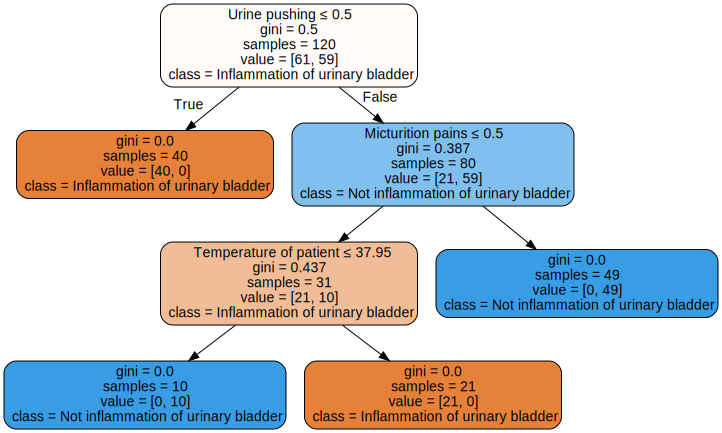

In [40]:
from sklearn import tree
X = df.iloc[: , :6]
Y = df.iloc[: , 6]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["Temperature of patient", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet"], class_names=["Inflammation of urinary bladder", "Not inflammation of urinary bladder"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

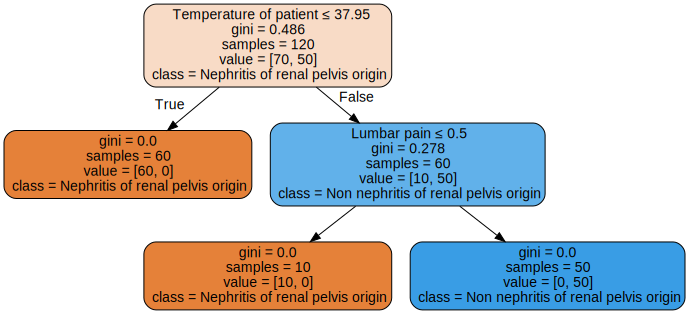

In [41]:
X = df.iloc[: , :6]
Y = df.iloc[: , 7]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["Temperature of patient", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet"], class_names=["Nephritis of renal pelvis origin", "Non nephritis of renal pelvis origin"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 1 (b) Build a decision tree on the whole data set and plot it.a

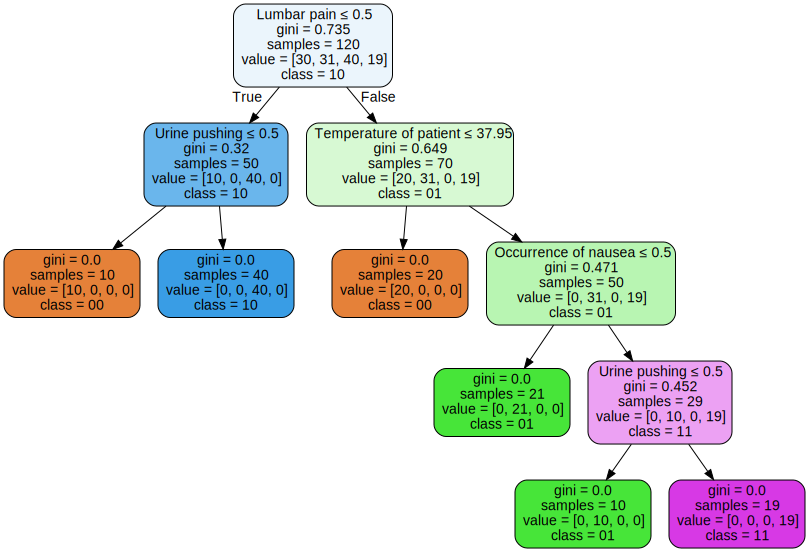

In [42]:
X = df.iloc[: , :6]
Y = df.iloc[: , 8]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["Temperature of patient", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet"], class_names=["00","01","10","11"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In above figure class corresponds to :
00 -> “No Inflammation of urinary bladder and No Nephritis of renal pelvis origin”
01 -> “No Inflammation of urinary bladder and Nephritis of renal pelvis origin”
10 -> “Inflammation of urinary bladder and No Nephritis of renal pelvis origin”
11 -> “Inflammation of urinary bladder and Nephritis of renal pelvis origin”

### 1 (c) Convert the decision rules into a set of IF-THEN rules.

In [43]:
def tree_to_pseudo(tree_, feature_names):

    """
    Outputs a decision tree model as if/then pseudocode

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    """

    left = tree_.tree_.children_left
    right = tree_.tree_.children_right
    threshold = tree_.tree_.threshold
    features = [feature_names[i] for i in tree_.tree_.feature]
    value = tree_.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if threshold[node] != -2:
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [44]:
tree_to_pseudo(clf, ["Temperature of patient", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet"])

 if ( Lumbar pain <= 0.5 ) {
   if ( Urine pushing <= 0.5 ) {
     return [[10.  0.  0.  0.]]
   } else {
     return [[ 0.  0. 40.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     if ( Occurrence of nausea <= 0.5 ) {
       return [[ 0. 21.  0.  0.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[ 0. 10.  0.  0.]]
       } else {
         return [[ 0.  0.  0. 19.]]
       }
     }
   }
 }


### 1 (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [45]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :6]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [54]:
path = tree.cost_complexity_pruning_path(X_train,y_train)
alphas, impurities = path.ccp_alphas, path.impurities
alphas

array([0.        , 0.10666667, 0.12352941, 0.19301587, 0.21209669])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_train, accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

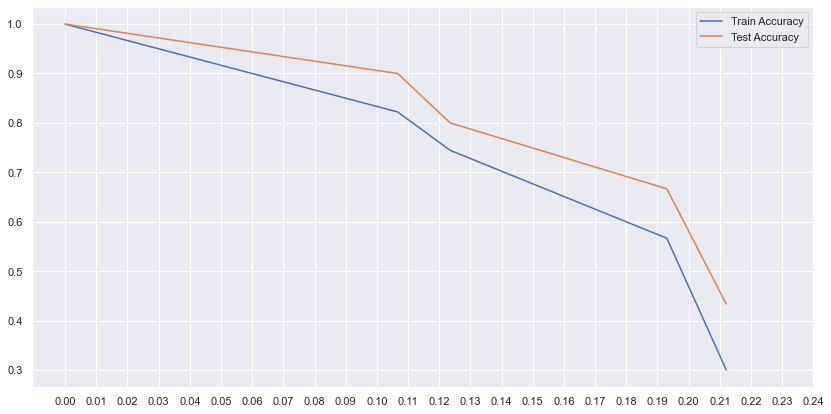

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set ()
plt.figure (figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas, label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

From above figure we find out that we obtain highest test and training accuracy when alpha = 0.00

So we will use cpp_aplha = 0.00 below

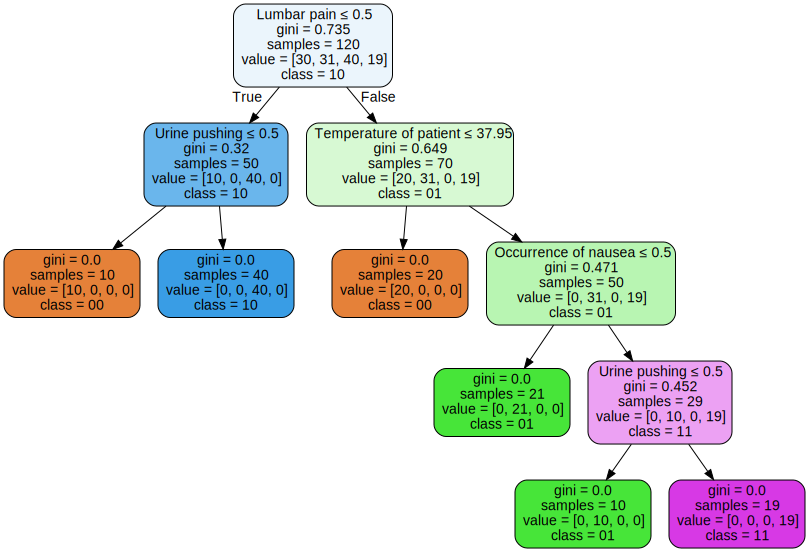

In [57]:
clf = DecisionTreeClassifier(ccp_alpha=0.00)
clf = clf.fit(X, Y)
dot_data = export_graphviz(clf, out_file=None, feature_names=["Temperature of patient", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet"], class_names=["00","01","10","11"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 2. The LASSO and Boosting for Regression

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.decomposition import PCA 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


### 2 (a) Import the [Communities and Crime data](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime.)

In [171]:
cols=[]
cols_stat=[]
index_stat=[]
stat_vals=[]
with open('../Data/communities.names', 'r') as data:
    for x, line in enumerate(data):
        if 74 < x < 203:
            cols.append(line.rsplit()[1])
        elif x==342:
            cols_stat.append(line.rsplit())
            cols_stat = sum(cols_stat, [])
        elif 341 < x < 466:
            index_stat.append((line.rsplit()[0]))
            stat_vals.append((line.rsplit()[1:]))

In [172]:
df_original = pd.read_csv('../Data/communities.csv', names=cols)
df_original.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45          ?   
2         ...               0.01     0.21            0.02          ?   
3         ...               0.02     0.39            0.28          ?   
4         ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00                ?                 0.67  
2                 0.00                ?                 0.43  
3                 0.00                ?                 0.12  
4                 0.00                ?                 0.03  

[5 rows x 128 columns]

In [173]:
# Replaced '?' values to NaN values
df_data = df_original.copy()
df_data.replace({'?':np.nan}, inplace=True)
df_data.head()

state county community        communityname  fold  population  \
0      8    NaN       NaN         Lakewoodcity     1        0.19   
1     53    NaN       NaN          Tukwilacity     1        0.00   
2     24    NaN       NaN         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45        NaN   
2         ...               0.01     0.21            0.02        NaN   
3         ...               0.02     0.39            0.28        NaN   
4         ...               0.04     0.09            0.02        NaN   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1            NaN                  NaN                  NaN   
2            NaN                  NaN                  NaN   
3            NaN                  NaN                  NaN   
4            NaN                  NaN                  NaN   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00              NaN                 0.67  
2                 0.00              NaN                 0.43  
3                 0.00              NaN                 0.12  
4                 0.00              NaN                 0.03  

[5 rows x 128 columns]

In [174]:
df_original_stats = pd.DataFrame(stat_vals, index=index_stat, columns=cols_stat)
df_original_stats.iloc[:] = df_original_stats.iloc[:].astype(float)
df_original_stats.head()

Min  Max  Mean    SD  Correl  Median  Mode  Missing
population     0.0  1.0  0.06  0.13    0.37    0.02  0.01      0.0
householdsize  0.0  1.0  0.46  0.16   -0.03    0.44  0.41      0.0
racepctblack   0.0  1.0  0.18  0.25    0.63    0.06  0.01      0.0
racePctWhite   0.0  1.0  0.75  0.24   -0.68    0.85  0.98      0.0
racePctAsian   0.0  1.0  0.15  0.21    0.04    0.07  0.02      0.0

## Training and Test Set
Use the first 1495 rows of data as the training set and the rest as the test set

In [175]:
# Training Set
df_tng = df_data.iloc[:1495,5:]
df_tng.tail()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
1490         0.07         0.41         0.28         0.23        0.57   
1491         0.42         0.44         0.57         0.40        0.25   
1492         0.01         0.44         0.42         0.27        0.63   
1493         0.01         0.40         0.40         0.24        0.29   
1494         1.00         0.37         0.52         0.33        0.44   

             ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
1490         ...               0.02     0.14            0.22        NaN   
1491         ...               0.07     0.40            0.14       0.07   
1492         ...               0.03     0.12            0.01        NaN   
1493         ...               0.08     0.15            0.02        NaN   
1494         ...               0.00     1.00            1.00          0   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
1490            NaN                  NaN                  NaN   
1491           0.05                 0.85                  0.5   
1492            NaN                  NaN                  NaN   
1493            NaN                  NaN                  NaN   
1494           0.01                 0.77                    0   

      LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
1490                 0.00              NaN                 0.03  
1491                 0.61             0.19                 0.20  
1492                 0.00              NaN                 0.30  
1493                 0.00              NaN                 0.03  
1494                 0.51             0.18                 0.23  

[5 rows x 123 columns]

In [176]:
# Test Set
df_test = df_data.iloc[1495:,5:]
df_test.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
1495         0.05         0.15         0.19         0.09        0.42   
1496         0.36         0.48         0.53         0.30        0.10   
1497         0.62         0.84         0.78         0.75        0.43   
1498         0.03         0.38         0.47         0.27        0.35   
1499         0.10         0.38         0.62         0.35        0.11   

             ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
1495         ...               0.01     0.23            0.73        NaN   
1496         ...               0.01     0.18            0.02        NaN   
1497         ...               0.01     0.18            0.00        NaN   
1498         ...               0.06     0.13            0.16        NaN   
1499         ...               0.03     0.23            0.06        NaN   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
1495            NaN                  NaN                  NaN   
1496            NaN                  NaN                  NaN   
1497            NaN                  NaN                  NaN   
1498            NaN                  NaN                  NaN   
1499            NaN                  NaN                  NaN   

      LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
1495                  0.0              NaN                 0.12  
1496                  0.0              NaN                 0.11  
1497                  0.0              NaN                 0.12  
1498                  0.0              NaN                 0.06  
1499                  0.0              NaN                 0.12  

[5 rows x 123 columns]

## 2 (b) Data Imputation
We are required to implement a data imputation technique to handle the missing data. We will therefore choose to replace the NaN values with the mean value of the column.
#### Data Imputation:  Entire Data Set

In [177]:
# Data imputation for the entire data set
df_all = df_data.iloc[:,5:]
df_all[:] = df_all.iloc[:].astype(float)
df_all = df_all.fillna(df_all.mean(skipna=True))
df_all.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20   0.060000   
1         ...               0.02     0.12            0.45   0.163103   
2         ...               0.01     0.21            0.02   0.163103   
3         ...               0.02     0.39            0.28   0.163103   
4         ...               0.04     0.09            0.02   0.163103   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0       0.040000             0.900000             0.500000   
1       0.076708             0.698589             0.440439   
2       0.076708             0.698589             0.440439   
3       0.076708             0.698589             0.440439   
4       0.076708             0.698589             0.440439   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32         0.140000                 0.20  
1                 0.00         0.195078                 0.67  
2                 0.00         0.195078                 0.43  
3                 0.00         0.195078                 0.12  
4                 0.00         0.195078                 0.03  

[5 rows x 123 columns]

#### Data Imputation:  Training Set

In [178]:
# Data imputation for only the Training Set
df_tng = df_data.iloc[:1495,5:]
df_tng[:] = df_tng.iloc[:].astype(float)
df_tng = df_tng.fillna(df_tng.mean(skipna=True))
df_tng.tail()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
1490         0.07         0.41         0.28         0.23        0.57   
1491         0.42         0.44         0.57         0.40        0.25   
1492         0.01         0.44         0.42         0.27        0.63   
1493         0.01         0.40         0.40         0.24        0.29   
1494         1.00         0.37         0.52         0.33        0.44   

             ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
1490         ...               0.02     0.14            0.22   0.163975   
1491         ...               0.07     0.40            0.14   0.070000   
1492         ...               0.03     0.12            0.01   0.163975   
1493         ...               0.08     0.15            0.02   0.163975   
1494         ...               0.00     1.00            1.00   0.000000   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
1490       0.080502             0.713054             0.451883   
1491       0.050000             0.850000             0.500000   
1492       0.080502             0.713054             0.451883   
1493       0.080502             0.713054             0.451883   
1494       0.010000             0.770000             0.000000   

      LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
1490                 0.00         0.190753                 0.03  
1491                 0.61         0.190000                 0.20  
1492                 0.00         0.190753                 0.30  
1493                 0.00         0.190753                 0.03  
1494                 0.51         0.180000                 0.23  

[5 rows x 123 columns]

#### Data Imputation:  Test Set

In [179]:
# Data imputation for only the Test Set
df_test = df_data.iloc[1495:,5:]
df_test[:] = df_test.iloc[:].astype(float)
df_test = df_test.fillna(df_test.mean(skipna=True))
df_test.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
1495         0.05         0.15         0.19         0.09        0.42   
1496         0.36         0.48         0.53         0.30        0.10   
1497         0.62         0.84         0.78         0.75        0.43   
1498         0.03         0.38         0.47         0.27        0.35   
1499         0.10         0.38         0.62         0.35        0.11   

             ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
1495         ...               0.01     0.23            0.73     0.1605   
1496         ...               0.01     0.18            0.02     0.1605   
1497         ...               0.01     0.18            0.00     0.1605   
1498         ...               0.06     0.13            0.16     0.1605   
1499         ...               0.03     0.23            0.06     0.1605   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
1495       0.065375             0.655375              0.40625   
1496       0.065375             0.655375              0.40625   
1497       0.065375             0.655375              0.40625   
1498       0.065375             0.655375              0.40625   
1499       0.065375             0.655375              0.40625   

      LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
1495                  0.0            0.208                 0.12  
1496                  0.0            0.208                 0.11  
1497                  0.0            0.208                 0.12  
1498                  0.0            0.208                 0.06  
1499                  0.0            0.208                 0.12  

[5 rows x 123 columns]

## 2 (c) Plot a correlation matrix for the features in the data set

In [180]:
# Find the correlation values for the correlation matrix
all_corr = df_all.corr()

#### Correlation Matrix Heatmap

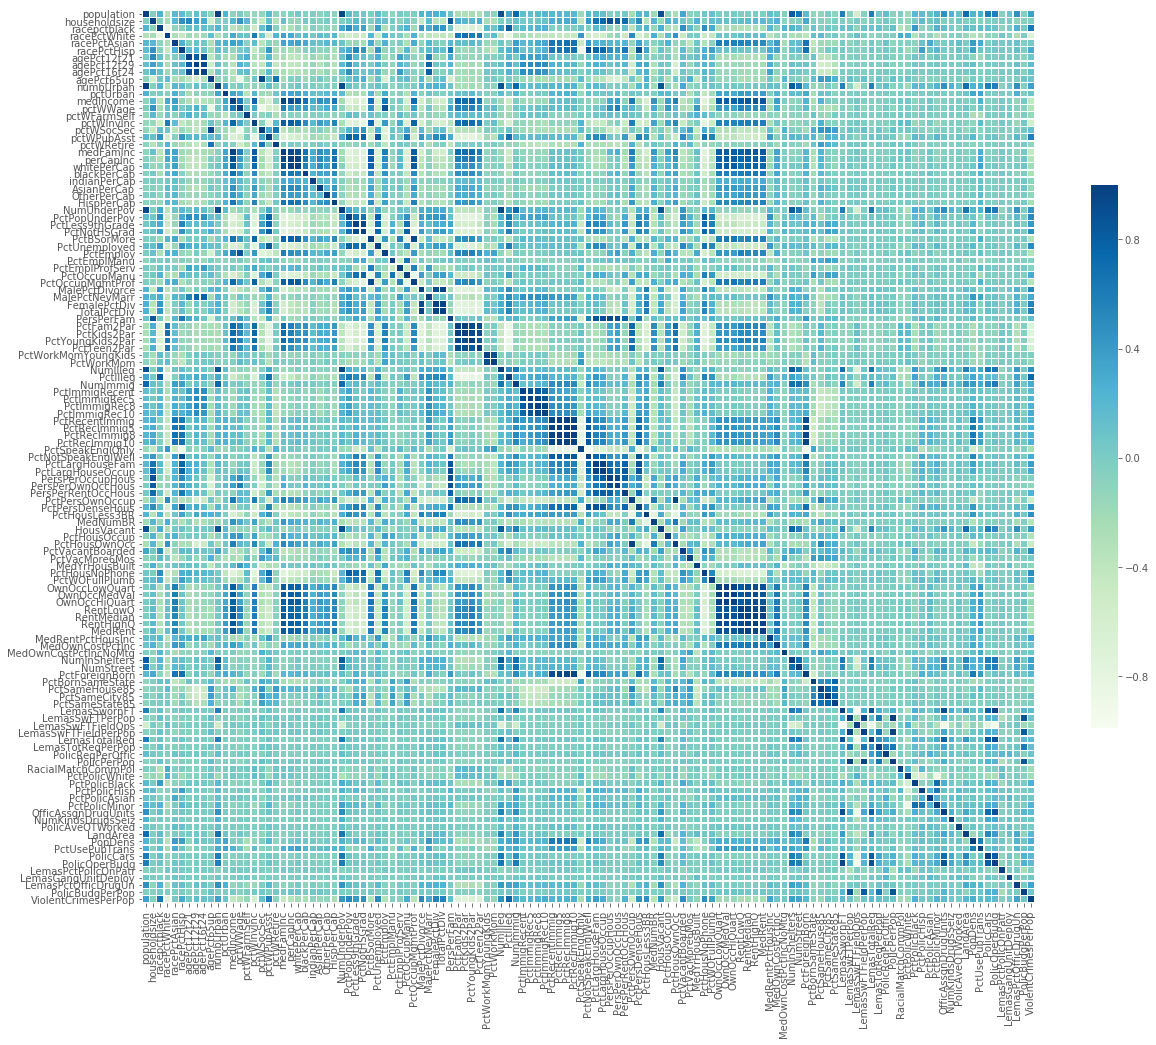

In [181]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(all_corr, cmap='GnBu', square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=all_corr.columns.values,
            yticklabels=all_corr.columns.values)

#### Correlation Matrix Heatmap with Values

In [182]:
all_corr.style.background_gradient(cmap='GnBu').set_precision(2)

## 2 (d) Calculate the Coefficient of Variation CV for each feature

CV = $\frac{s}{m}$, where $s$ = sample standard deviation, and $m$ = sample mean

In [183]:
all_mean = df_all.mean(skipna=True)
tng_mean = df_tng.mean(skipna=True)
test_mean = df_test.mean(skipna=True)
all_std = df_all.std(skipna=True)
tng_std = df_tng.std(skipna=True)
test_std = df_test.std(skipna=True)

all_CV = all_std/all_mean
tng_CV = tng_std/tng_mean
test_CV = test_std/test_mean

In [184]:
all_CV.head()

population       2.203503
householdsize    0.353298
racepctblack     1.410920
racePctWhite     0.323782
racePctAsian     1.359162
dtype: float64

### 2 (e) Pick $\sqrt{128}$ Features with Highest CV

In [185]:
sqrt128 = int(math.sqrt(128))
all_CVsorted = all_CV.sort_values(ascending=False)[:sqrt128]
print('The top {} features with the highest CV are: '.format(sqrt128))
print('')
print(all_CVsorted[:int(math.sqrt(128))])

The top 11 features with the highest CV are: 

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
dtype: float64


### Scatter Plot
In viewing the scatter plot of the top $\sqrt{128}$ features with the highest coefficient of variation, we can see that some features have a linear relationship.
* population and numbUrban have a strong linear relationship
* NumIlleg has a generally linear relationship with NumUnderPov, population, numbUrban 
* NumUnderPov has a generally linear relatinoship with population, numbUrban

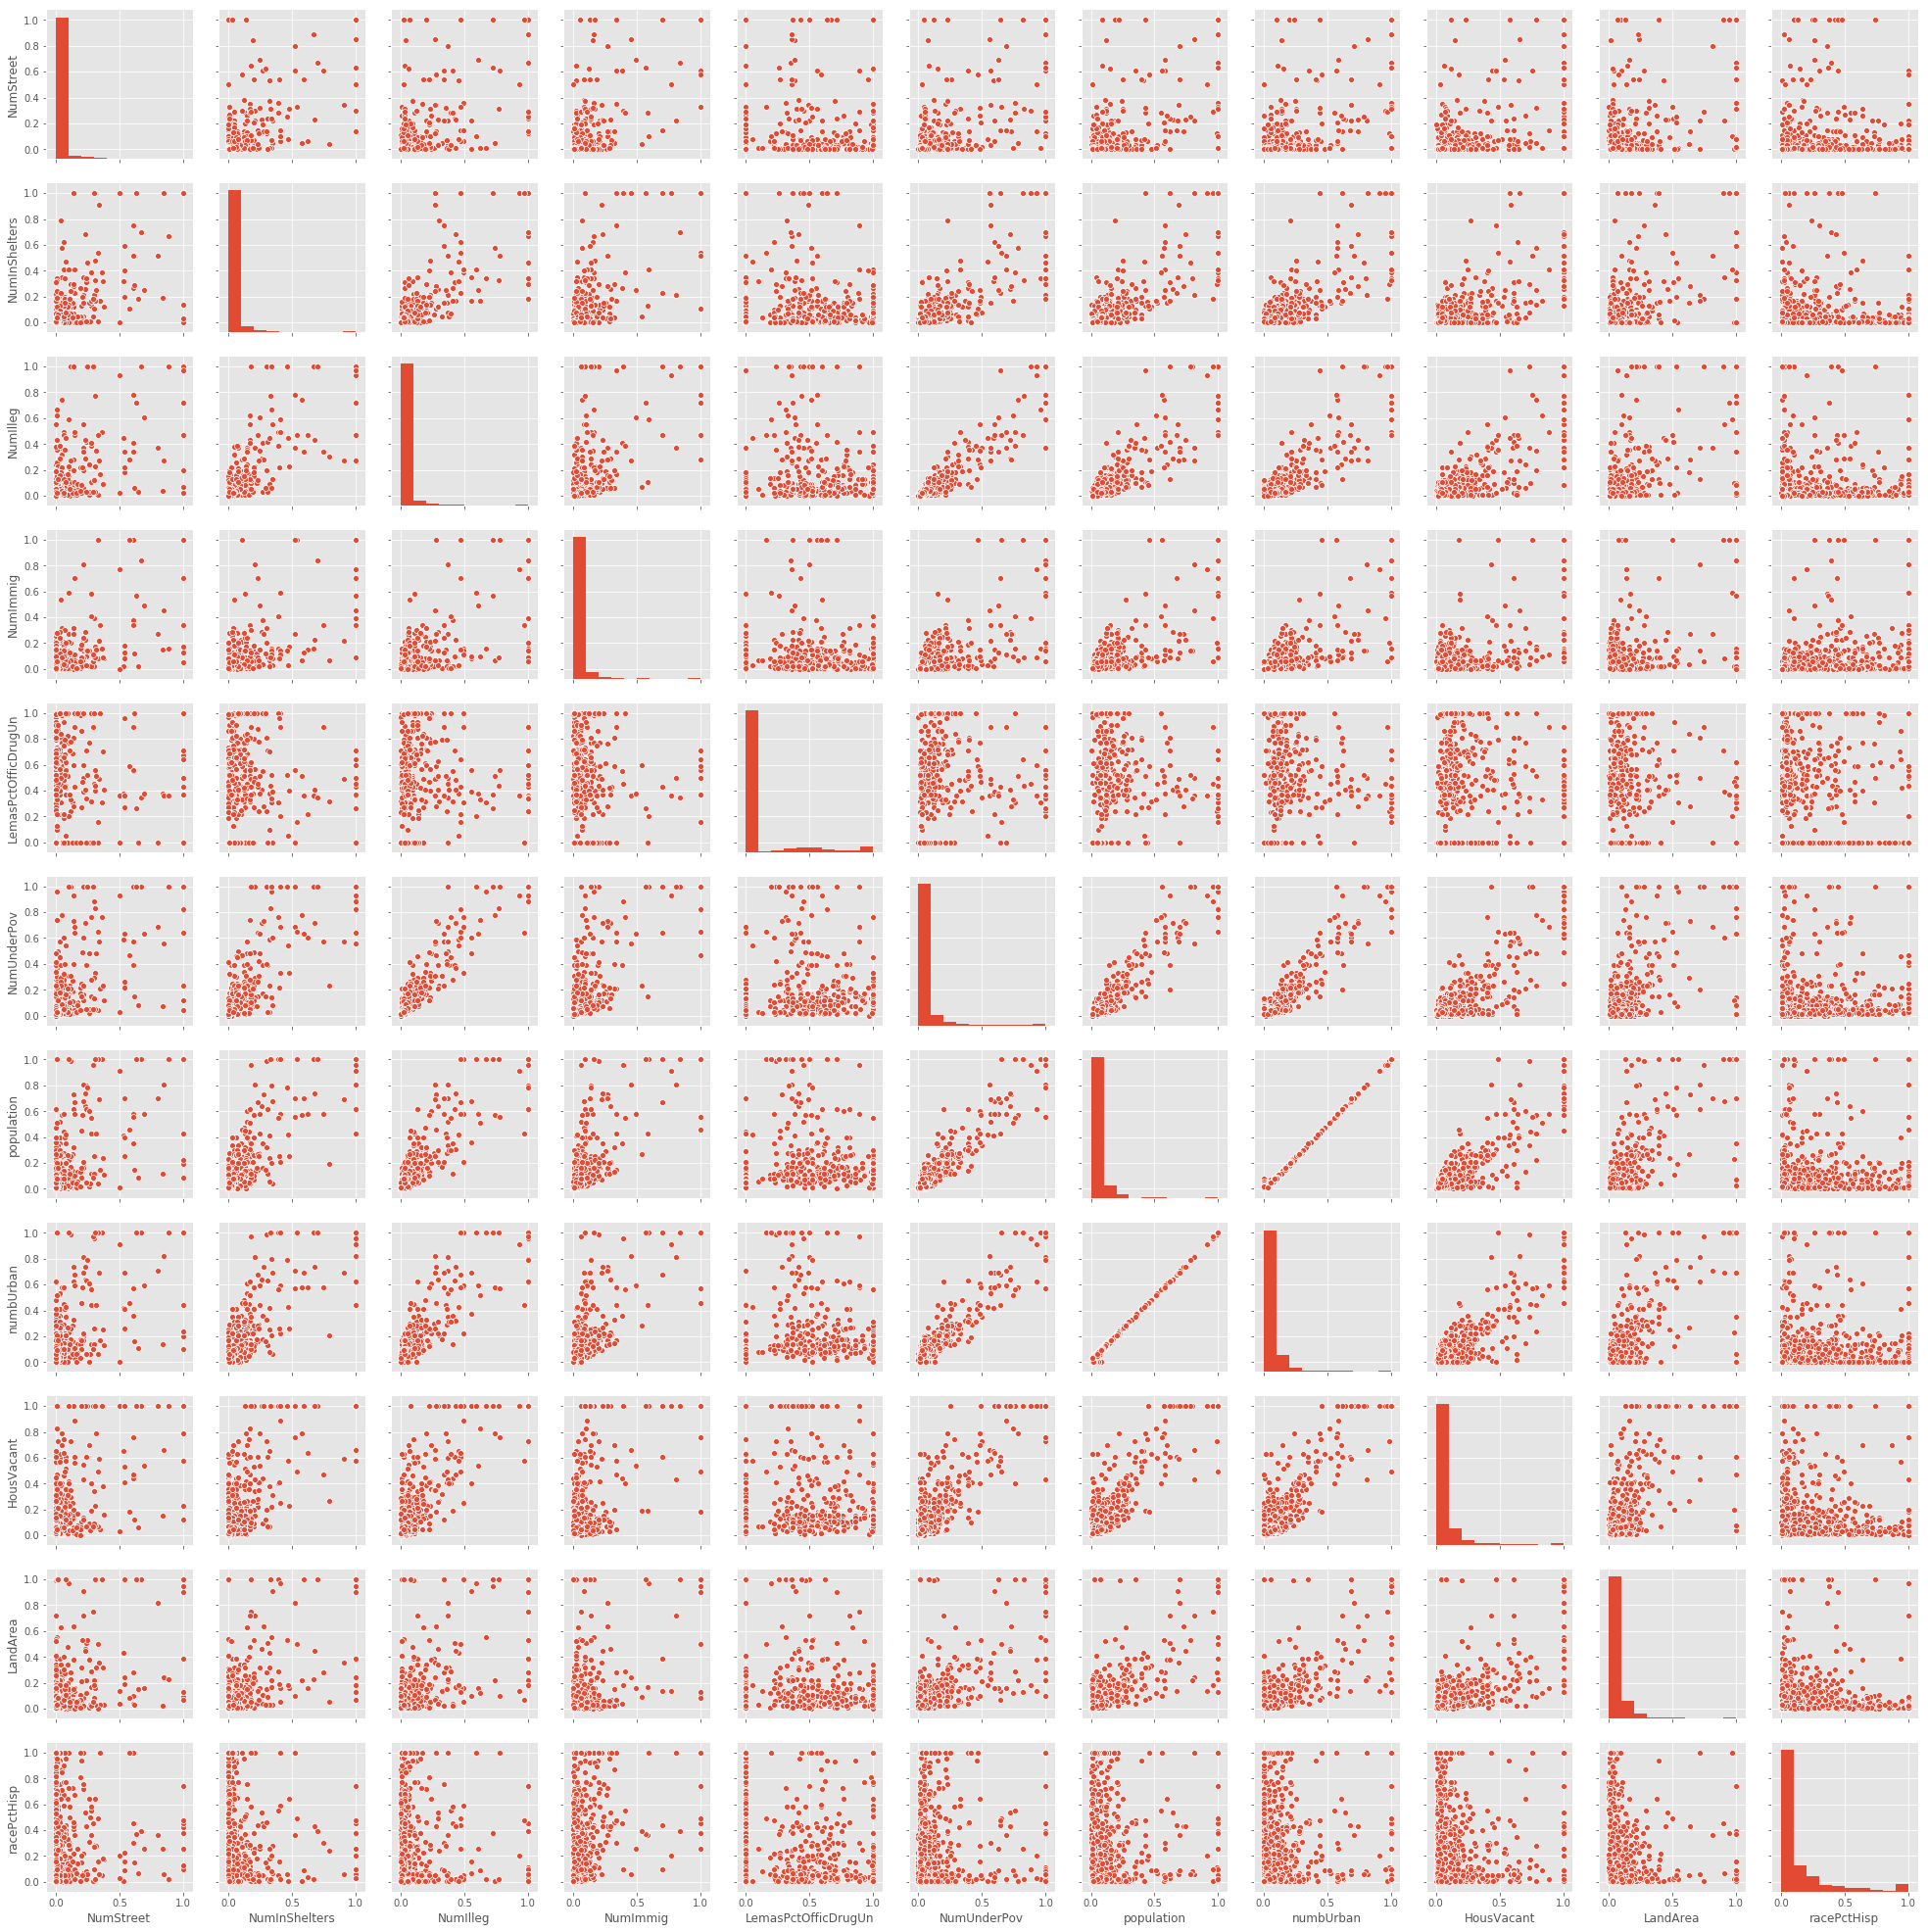

In [186]:
df_allCVsorted = df_all[all_CVsorted.keys()]
sns.pairplot(df_allCVsorted)

### Boxplot

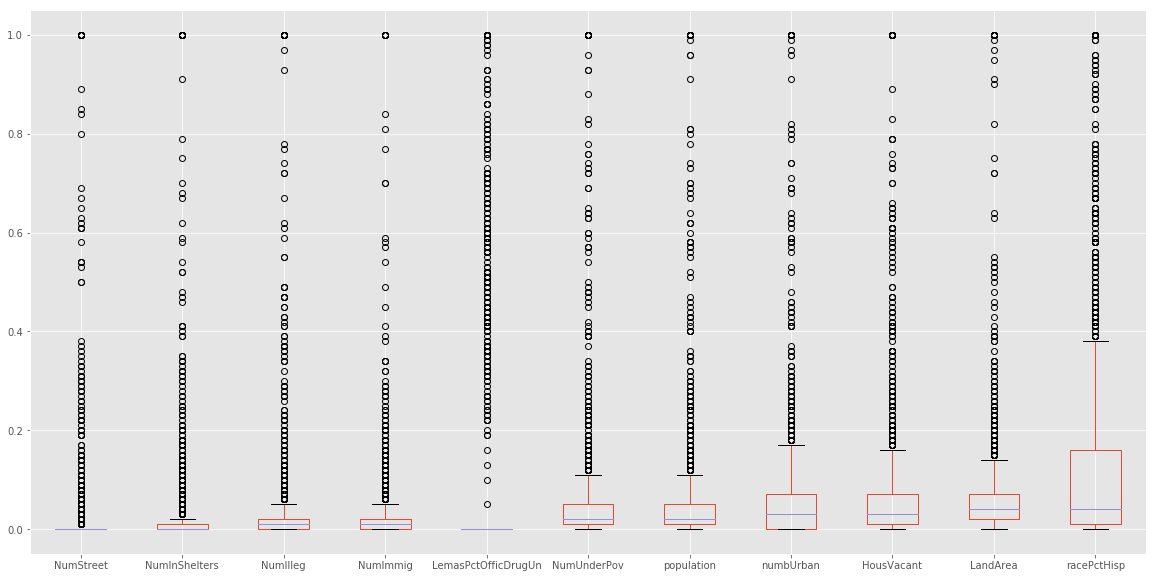

In [187]:
df_allCVsorted.boxplot(figsize=(20,10))

## 2 (f) Fit a linear model using least squares to the training set and report the test error.

In [188]:
# create the formula for use with StatsModels
features_all = ' + '.join(cols[5:-1])
f = cols[-1] + ' ~ ' + features_all
f

'ViolentCrimesPerPop ~ population + householdsize + racepctblack + racePctWhite + racePctAsian + racePctHisp + agePct12t21 + agePct12t29 + agePct16t24 + agePct65up + numbUrban + pctUrban + medIncome + pctWWage + pctWFarmSelf + pctWInvInc + pctWSocSec + pctWPubAsst + pctWRetire + medFamInc + perCapInc + whitePerCap + blackPerCap + indianPerCap + AsianPerCap + OtherPerCap + HispPerCap + NumUnderPov + PctPopUnderPov + PctLess9thGrade + PctNotHSGrad + PctBSorMore + PctUnemployed + PctEmploy + PctEmplManu + PctEmplProfServ + PctOccupManu + PctOccupMgmtProf + MalePctDivorce + MalePctNevMarr + FemalePctDiv + TotalPctDiv + PersPerFam + PctFam2Par + PctKids2Par + PctYoungKids2Par + PctTeen2Par + PctWorkMomYoungKids + PctWorkMom + NumIlleg + PctIlleg + NumImmig + PctImmigRecent + PctImmigRec5 + PctImmigRec8 + PctImmigRec10 + PctRecentImmig + PctRecImmig5 + PctRecImmig8 + PctRecImmig10 + PctSpeakEnglOnly + PctNotSpeakEnglWell + PctLargHouseFam + PctLargHouseOccup + PersPerOccupHous + PersPerOwnOc

In [189]:
# Create the X and y variables for the Training and Test Sets
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

# Linear Regression
lin_mod_all = smf.ols(formula=f, data=df_tng).fit()
y_predLin = lin_mod_all.predict(X_test)
test_errorLinReg = mean_squared_error(y_test, y_predLin)
print('The linear regression test error (MSE) was: {}'.format(test_errorLinReg))
lin_mod_all.summary()

The linear regression test error (MSE) was: 0.018112462026533566


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Tue, 05 Mar 2019   Prob (F-statistic):          6.56e-291
Time:                         19:25:28   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4544      0.904      0.503      0.615      -1.319       2.228
population               -0.0199      0.477     -0.042      0.967      -0.955       0.916
householdsize            -0.0157      0.098     -0.161      0.872      -0.207       0.176
racepctblack              0.2848      0.060      4.754      0.000       0.167       0.402
racePctWhite              0.0106      0.067      0.159      0.874      -0.120       0.141
racePctAsian             -0.0278      0.041     -0.670      0.503      -0.109       0.054
racePctHisp               0.0180      0.065      0.275      0.784      -0.110       0.146
agePct12t21               0.1792      0.129      1.387      0.166      -0.074       0.433
agePct12t29              -0.3451      0.186     -1.858      0.063      -0.709       0.019
agePct16t24              -0.1237      0.198     -0.626      0.531      -0.511       0.264
agePct65up                0.0597      0.124      0.481      0.630      -0.184       0.303
numbUrban                -0.1260      0.465     -0.271      0.786      -1.038       0.786
pctUrban                  0.0484      0.019      2.581      0.010       0.012       0.085
medIncome                -0.1784      0.202     -0.881      0.378      -0.575       0.219
pctWWage                 -0.1399      0.107     -1.309      0.191      -0.350       0.070
pctWFarmSelf              0.0460      0.023      1.960      0.050   -3.35e-05       0.092
pctWInvInc               -0.2031      0.081     -2.505      0.012      -0.362      -0.044
pctWSocSec                0.1368      0.125      1.092      0.275      -0.109       0.383
pctWPubAsst               0.0601      0.054      1.109      0.268      -0.046       0.166
pctWRetire               -0.1249      0.045     -2.802      0.005      -0.212      -0.037
medFamInc                 0.3049      0.189      1.617      0.106      -0.065       0.675
perCapInc                -0.0485      0.222     -0.219      0.827      -0.484       0.387
whitePerCap              -0.1923      0.179     -1.072      0.284      -0.544       0.160
blackPerCap              -0.0401      0.030     -1.358      0.175      -0.098       0.018
indianPerCap             -0.0436      0.023     -1.911      0.056      -0.088       0.001
AsianPerCap               0.0301      0.022      1.381      0.168      -0.013       0.073
OtherPerCap               0.0304      0.022      1.364      0.173      -0.013       0.074
HispPerCap                0.0330      0.029      1.150      0.250      -0.023       0.089
NumUnderPov               0.0737      0.192      0.383      0.702      -0.303       0.451
PctPopUnderPov           -0.2035      0.074     -2.736      0.006      -0.349      -0.058
PctLess9thGrade          -0.0584      0.079     -0.743      0.457      -0.213       0.096
PctNotHSGrad

As we can see in the output above, our linear model MSE = 0.01811.

## 2 (g) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

In [190]:
# Ridge regression with cross validation on the Training Set
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

ridgeCV_tng = RidgeCV(cv=10, normalize=False).fit(X_train, y_train)
lambdaCV = ridgeCV_tng.alpha_
y_predRidge = ridgeCV_tng.predict(X_test)
ridgeCV_MSE = mean_squared_error(y_test, y_predRidge)

print('The ridge regression model test error (MSE) was: {}'.format(ridgeCV_MSE))
print()
print('The lambda chosen by cross-validation was: {}'.format(lambdaCV))

The ridge regression model test error (MSE) was: 0.017723737122827796

The lambda chosen by cross-validation was: 1.0


## 2 (h) Fit a LASSO model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

### LASSO Model

In [191]:
# LASSO on the Training Set
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

lassoCV_tng = LassoCV(cv=10, normalize=False, max_iter=50000).fit(X_train, y_train)
lambdaCVlasso = lassoCV_tng.alpha_
pNumLasso_features = np.sum(lassoCV_tng.coef_!=0)
y_predLasso = lassoCV_tng.predict(X_test)
lassoCV_MSE = mean_squared_error(y_test, y_predLasso)

features_Lasso = [f for f,s in zip(X_train.columns, lassoCV_tng.coef_) if s]

print('The LASSO model test error (MSE) was: {}'.format(lassoCV_MSE))
print()
print('The lambda chosen by cross-validation was: {}'.format(lambdaCVlasso))
print()
print('The LASSO model selected {} features.'.format(pNumLasso_features))
print()
print('The features selected by the LASSO model:')
print()
print(features_Lasso)

The LASSO model test error (MSE) was: 0.01774934769131434

The lambda chosen by cross-validation was: 0.00010831930127505126

The LASSO model selected 77 features.

The features selected by the LASSO model:

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFul

### LASSO Model with Standardized Values

In [192]:
# LASSO on the Training Set with standardized values
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

# Standardize the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

lassoCV_tngSC = LassoCV(cv=10, normalize=False, max_iter=50000).fit(X_train_sc, y_train)
lambdaCVlassoSC = lassoCV_tngSC.alpha_
pNumLasso_featuresSC = np.sum(lassoCV_tngSC.coef_!=0)
y_predLassoSC = lassoCV_tngSC.predict(X_test)
lassoCV_MSE_sc = mean_squared_error(y_test, y_predLassoSC)

features_LassoSC = [f for f,s in zip(X_train.columns, lassoCV_tngSC.coef_) if s]

print('The LASSO model test error (MSE) with standardized values was: {}'.format(lassoCV_MSE_sc))
print()
print('The lambda chosen via cross-validation with standardized values was: {}'.format(lambdaCVlassoSC))
print()
print('The LASSO model selected {} features with standardized values.'.format(pNumLasso_featuresSC))
print()
print('The features selected by the LASSO model with standardized values:')
print()
print(features_LassoSC)

The LASSO model test error (MSE) with standardized values was: 0.035496247068106807

The lambda chosen via cross-validation with standardized values was: 0.0006636910154760816

The LASSO model selected 76 features with standardized values.

The features selected by the LASSO model with standardized values:

['population', 'racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup

In comparing the results between the original LASSO model and the LASSO model with standardized features, we see that:
* the MSE increased from 0.017749 to 0.035496
* the lambda increased from 0.000108319 to 0.000663691
* the number of features selected decreased from 77 to 76.

This tells us that the original LASSO model performed better than the LASSO model with standardized features.

## 2(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

PCA combined with linear regression allows us to conduct PCR to select $M$ number of principal components via cross-validation. In doing cross-validation, we opted to use 10-folds cross-validation and the MSE to evaluate and select the $M$ principal components. 

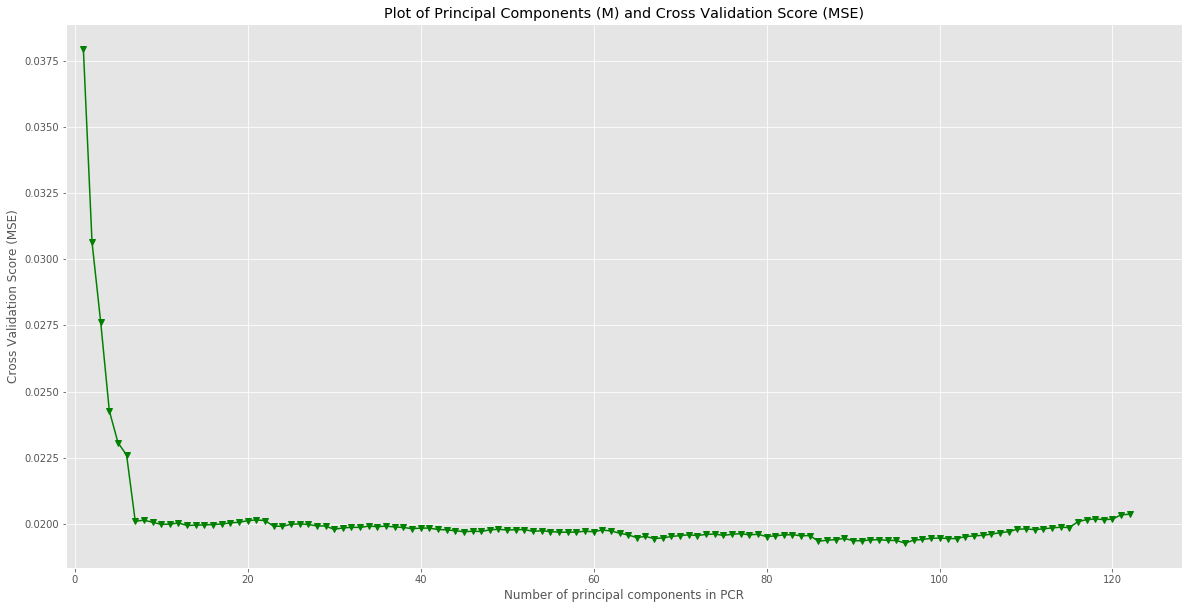

In [309]:
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

# Instantiate the PCA model
pca = PCA()
X_trainReduced = pca.fit_transform(X_train)
X_testReduced = pca.fit_transform(X_test)

# Instantiate the linear regression model
linRegPCA = LinearRegression()

# Calculate MSE using CV for the principle components, adding one component at a time.
PCA_CVmse_list = []
PCA_mseTest_list = []
M_list=[]

for i in range(1,len(X_train.columns)+1):
    M_list.append(i)
    PCA_CVmse = -1*cross_val_score(linRegPCA, X_trainReduced[:,:i], y_train.ravel(), cv=10, scoring='neg_mean_squared_error', error_score=np.nan).mean()
    PCA_CVmse_list.append(PCA_CVmse)

    linRegPCA.fit(X_trainReduced[:,:i], y_train.ravel())
    y_pred = linRegPCA.predict(X_testReduced[:,:i])
    MSE_test = mean_squared_error(y_test, y_pred)
    PCA_mseTest_list.append(MSE_test)

f, ax = plt.subplots(figsize=(20,10))
plt.plot(list(range(1,len(X_train.columns)+1)), PCA_CVmse_list, color='green', marker='v')
plt.xlabel('Number of principal components in PCR')
plt.ylabel('Cross Validation Score (MSE)')
plt.title('Plot of Principal Components (M) and Cross Validation Score (MSE)')
plt.xlim(left=-1);

In [310]:
# Consolidate the pertinent values for PCR
df_PCA = pd.DataFrame({'M':M_list,
                       'PCA_CV_Score(MSE)':PCA_CVmse_list,
                       'PCA_MSE_Test':PCA_mseTest_list})

In [311]:
# Find the value lowest MSE
df_PCA.sort_values(by='PCA_CV_Score(MSE)', ascending=True).head(n=1)

M  PCA_CV_Score(MSE)  PCA_MSE_Test
95  96           0.019282      0.028136

The plot above shows marker points for the cross-validation score (using MSE as the scoring metric) for every value of $M$ number of principal compnents. From a visual perspective, we can see that the lowest point is when $M$ is in the mid 90s.

Additionally, our lowest cross-validation score was 0.019282 for $M = 96$ number of principal components. The test error found with the retrained PCR model having $M = 96$ number of principal components was 0.028136.

## 2 (j) Boosting Tree
For this part of the assignment, we will build a multivariate regression tree by fitting an $\mathscr{L}_1$-penalized gradient boosting tree using XGBoost.

In [196]:
import xgboost as xgb
from sklearn.model_selection import cross_validate, GridSearchCV

I have use scikit-learn's GridSearchCV to cross-validate for the $\mathscr{L}_1$ regularization term $\alpha$. Since GridSearchCV allows us to tune and cross-validate multple parameters, I will also cross-validate for the 'max_depth' parameter.


Reference : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

In [305]:
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

# Instantiate the XGBoost model
xgbReg =  xgb.XGBRegressor()

# Define the parameters to tune using cross-validation with GridSearchCV
params = {'max_depth':[3,4,5,6,7], 
          'reg_alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.025, 0.05, 0.1, 0.75, 0.5, 0.75, 1, 1.0001, 1.01, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 2, 3, 4, 5]
         }

# Use GridSearchCV to find the best alpha using cross-validation
xgb_gridSearchCV = GridSearchCV(estimator=xgbReg, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=4)
xgb_gridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 4, 5, 6, 7], 'reg_alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.1, 0.75, 0.5, 0.75, 1, 1.0001, 1.01, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [306]:
print('The best parameters found using cross-validation for our boosting tree are: {}'.format(xgb_gridSearchCV.best_params_))
print('The cross-validation score was: {}'.format(-1*xgb_gridSearchCV.best_score_))

X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

y_predXGB = xgb_gridSearchCV.predict(X_test)
xgb_MSE_gridsearch = mean_squared_error(y_test, y_predXGB)

print('The test score (MSE) for our L1-penalized gradient boosting tree using the best parameters found using cross-validation was:  {}'.format(xgb_MSE_gridsearch))

The best parameters found using cross-validation for our boosting tree are: {'max_depth': 5, 'reg_alpha': 1.05}
The cross-validation score was: 0.019775978109843446
The test score (MSE) for our L1-penalized gradient boosting tree using the best parameters found using cross-validation was:  0.01648779568490107


As we can see in the output above, our best $\mathscr{L}_1$ regularization term $\alpha$ using cross-validation came to 1.05.

Using the $\mathscr{L}_1$ regularization term $\alpha$ = 1.05, our test score (MSE) came to  0.0164878.

In [307]:
X_train = df_tng.loc[:,df_tng.columns != 'ViolentCrimesPerPop']
y_train = df_tng.loc[:,'ViolentCrimesPerPop']
X_test = df_test.iloc[:,df_test.columns != 'ViolentCrimesPerPop']
y_test = df_test.loc[:,'ViolentCrimesPerPop']

xgbReg =  xgb.XGBRegressor()

alphas = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.025, 0.05, 0.1, 0.75, 0.5, 0.75, 1, 1.0001, 1.01, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 2, 3, 4, 5]

xgb_MSE_list = []
for alpha in alphas:
    xgbReg =  xgb.XGBRegressor(reg_alpha=alpha, objective='reg:linear', max_depth=5)
    score = cross_validate(xgbReg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    xgb_MSE_list.append((score['test_score']*-1).mean())

In [308]:
index = xgb_MSE_list.index(min(xgb_MSE_list))
alphas[index]

1.05

As we can see in the output above, our $\mathscr{L}_1$ regularization term $\alpha$ = 1.05, which is the same value that we found when using cross-validation with GridSearchCV.